In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [3]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    """Take an image, start/stop position in both x and y, window size of x/y and overlap fraction.
        Return a bounding boxes for searching window."""
    h,w,c = img.shape # Assume a 3D image
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] is None:
        x_start_stop[0] = 0
    if x_start_stop[1] is None:
        x_start_stop[1] = w
    if y_start_stop[0] is None:
        y_start_stop[0] = 0
    if y_start_stop[1] is None:
        y_start_stop[1] = h
    # Compute the span of the region to be searched
    span_x = x_start_stop[1] - x_start_stop[0]
    span_y = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    pix_x = np.floor(xy_window[1] * (1-xy_overlap[1])).astype(int)
    pix_y = np.floor(xy_window[0] * (1-xy_overlap[0])).astype(int)
    # Compute the number of windows in x/y
    num_x = np.ceil((span_x-xy_window[1])/pix_x + 1).astype(int)
    num_y = np.ceil((span_y-xy_window[0])/pix_y + 1).astype(int)
    # Initialize a list to append window positions to
    window_list = []
    for row in range(num_y):
        for col in range(num_x):
            y_start = y_start_stop[0]+row*pix_y
            y_end = y_start + xy_window[0]
            x_start = x_start_stop[0]+col*pix_x
            x_end = x_start + xy_window[1]
            if y_end > h:
                y_end = h
            if x_end > w:
                x_end = w
            window_list.append(((x_start,y_start),(x_end,y_end)))
    return window_list

In [6]:
def slide_window_udacity(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

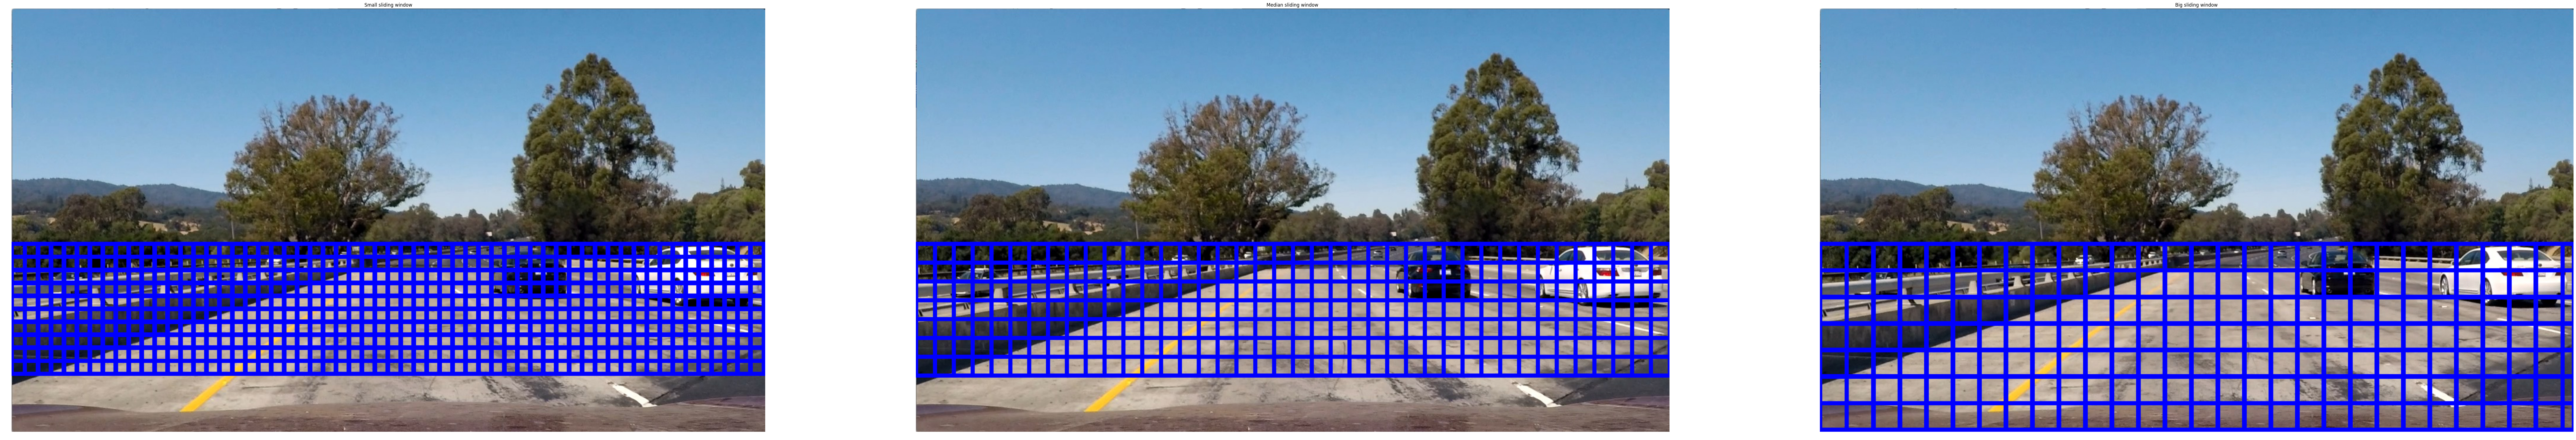

In [12]:
image = mpimg.imread('/Users/jinjunjie/a_self_driving_car/Advanced line finding/Proj-Advanced-Lane-Lines/test_images/test1.jpg')

plt.figure(figsize=(120,100))
ystart, ystop = 400,600
xstart, xstop = 0,1280
windows = slide_window(image, x_start_stop=[xstart, xstop], y_start_stop=[ystart, ystop], 
                    xy_window=(45, 45), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.subplot(131)
plt.title('Small sliding window')
plt.axis('off')
plt.imshow(window_img)

ystart, ystop = 400,600
xstart, xstop = 0, 1280
windows = slide_window(image, x_start_stop=[xstart, xstop], y_start_stop=[ystart, ystop], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.subplot(132)
plt.title('Median sliding window')
plt.axis('off')
plt.imshow(window_img)

ystart, ystop = 400,690
xstart, xstop = 0, 1280
windows = slide_window(image, x_start_stop=[xstart, xstop], y_start_stop=[ystart, ystop], 
                    xy_window=(91, 91), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.subplot(133)
plt.title('Big sliding window')
plt.axis('off')
plt.imshow(window_img)

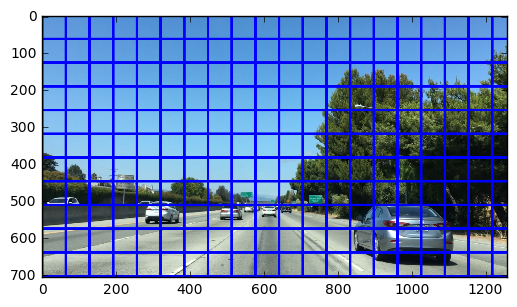

In [7]:
windows_udacity = slide_window(image, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows_udacity, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)